---

# Research for Yandex.Afisha

This  is to help optimize marketing expenses by studiying How people use the product, When do customer start to buy, How much money each one brings and when does the investment pay off.


### Table of Contents
* <a href="#Step 1">Opening the Data ></a><br>
    * <a href="#visitshead">Visits</a><br>
    * <a href="#ordersdata">Orders</a><br>
    * <a href="#expensesdata">Expenses</a><br>
        * <a href="#step1_conclusion">Conclusion</a><br>
* <a href="#Step 2">Reports and calculate metrics</a><br>
    * <a href="#product">Product</a><br>
        * <a href="#uniquedaysessions">Unique day sessions</a><br>
        * <a href="#lengthsessions">Session length</a><br>
        * <a href="#userretention">User retention</a><br>
    * <a href="#Sales">Sales</a><br>
        * <a href="#buystart">Start of buying</a><br>
        * <a href="#effectivechannel">Most effective channel</a><br>
        * <a href="#ordertime">Monthly orders</a><br>
        * <a href="#avgpurchase">Average purchase size</a><br>
        * <a href="#LTV">Lifetime value</a><br>
    * <a href="#marketing">Marketing</a><br>
        * <a href="#cac">Customer acquisition</a><br>
        * <a href="#ROI">Return of Investment</a><br>
            * <a href="#step2_conclusion">Conclusion</a><br>
* <a href="#Step 3">Overall Conclusion</a><br>
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
#import datetime
import datetime as dt

%matplotlib inline 

<p><a name="Step 1"></a></p>

### Step 1. Download the data and prepare it for analysis

In [2]:
try:
    visits = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint 7/visits_log_us (1).csv')
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv')

try:
    orders = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint 7/orders_log_us.csv')
except:
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    
try:
    expenses = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint 7/costs_us.csv')
except:
    expenses = pd.read_csv('/datasets/costs_us.csv')

In [3]:
# checking the visit_log Dataframe
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
# checking the device column for unique values
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [5]:
#converting the device column to categpry format.
visits['Device'] = visits['Device'].astype('category') 

<p><a name="visitshead"></a></p>

In [6]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [7]:
# coverting the start_ts and end ts column to datetime formats.
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'], format='%Y-%m-%d %H:%M:%S')
visits['End Ts'] =  pd.to_datetime(visits['End Ts'], format='%Y-%m-%d %H:%M:%S')

In [8]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [9]:
visits.shape

(359400, 5)

In [10]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


The visists dataframe has 359400 rows and 5 columns and no null values.The dataframe has been optimized by converting the column device has to cetegory and  columns End TS and Start TS to datetime64.

<p><a name="ordersdata"></a></p>

In [11]:
# checking the orders_log dataframe
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [12]:
# coverting the buy Ts column to datetime formats.
orders['Buy Ts'] =  pd.to_datetime(orders['Buy Ts'], format='%Y-%m-%d %H:%M:%S')


In [13]:
#Checking for the number of row and columns
orders.shape

(50415, 3)

In [14]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [15]:
#printing the head of the dataframe to see how it look like
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


The orders dataframe has 50415 rows and 3 columns, it has no null values and it is already optimized by converting the 'Buy Ts' column to datetime64 format.

<p><a name="expensesdata"></a></p>

In [16]:
# checking the expenses dataframe
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [17]:
# coverting the buy Ts column to datetime formats.
expenses['dt'] =  pd.to_datetime(expenses['dt'], format='%Y-%m-%d')

In [18]:
#converting the costs column to int and round it off
expenses['costs']= expenses['costs'].round(0).astype(int)

In [19]:
expenses.shape

(2542, 3)

In [20]:
expenses.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.479150
std,3.181581,156.292965
min,1.000000,1.000000
25%,2.000000,22.000000
50%,4.000000,77.000000
75%,9.000000,170.000000
max,10.000000,1788.000000


In [21]:
print(expenses.head())

   source_id         dt  costs
0          1 2017-06-01     75
1          1 2017-06-02     62
2          1 2017-06-03     37
3          1 2017-06-04     55
4          1 2017-06-05     57


<p><a name="step1_conclusion"></a></p>

#### Step 1 Conclusion

We have 3 Datasets, the visits data which has 359400 rows and 5 columns, the orders data which has 50415 rows and 3 columns and expenses data with 2542 rows and  3 columns.There are  data types which are in wrong formats like the dates which are all in object instead of datetime64, and some real numbers which needs to be converted to int for optimization. there are no duplicates and NaN values which need to be processed.

<p><a name="Step 2"></a></p>

### Step 2. Make reports and calculate metrics

<p><a name="product"></a></p>

**Product**

We will be using the metric  daily active users (DAU), weekly active users(WAU), and monthly active users (MAU) for measuring user retention and engagement.

In [22]:
# calculating the number of visits per day
visits['visit_date'] = visits['Start Ts'].map(lambda x: x.date())

In [23]:
# Create a Group by object using visit date
visit_date =visits.groupby('visit_date')

In [24]:
# Compute number of visits by date and check out the result
visits_by_date = pd.DataFrame(visit_date.size(), columns=['num_visits'])

In [25]:
print(visits_by_date.head())

            num_visits
visit_date            
2017-06-01         664
2017-06-02         658
2017-06-03         477
2017-06-04         510
2017-06-05         893


Total number of daily visits in graphical presentation.

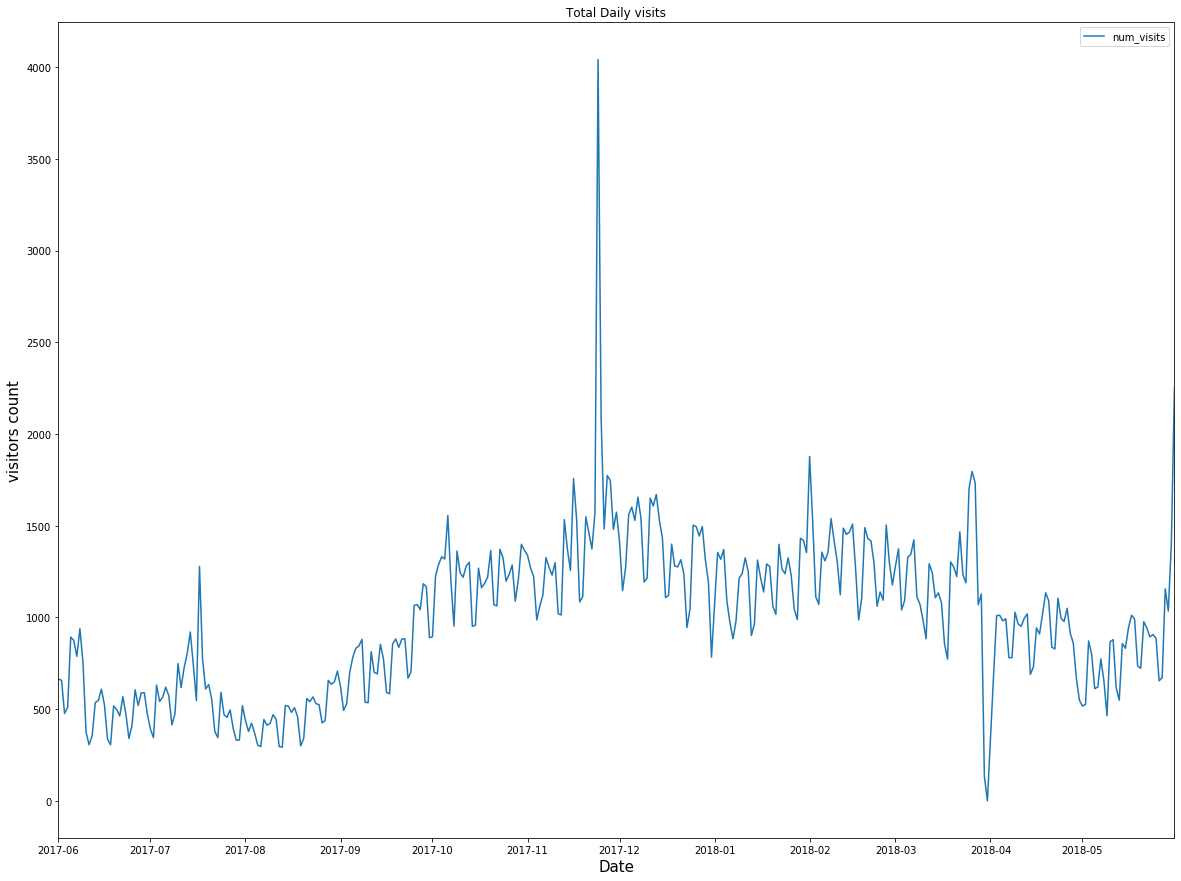

In [26]:
visits_by_date.plot(figsize = (20, 15))
plt.title('Total Daily visits')
plt.legend()
plt.xlabel('Date', size=15)
plt.ylabel('visitors count', size=15);


In the graph we can see that the traffic started to pick up on the last quarter of 2017, we can also see the highest number of visit was recorded on the month of december which is probably because of the christmas shopping.

In [27]:
# calculating the visitors per week
visits['week'] = visits['Start Ts'].values.astype('datetime64[W]')

In [28]:
visits_weekly =visits.groupby('week')[['Start Ts']].count()
visits_weekly.head()

,Start Ts
week,
2017-06-01,4865
2017-06-08,3813
2017-06-15,3255
2017-06-22,3509
2017-06-29,3538


The weekly traffic data in graphical presentation.

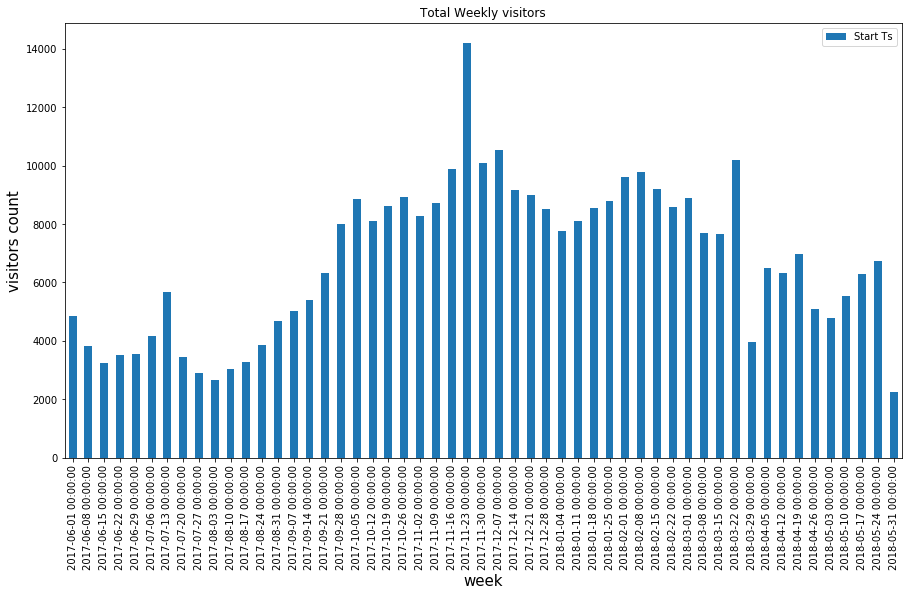

In [29]:
visits_weekly.plot.bar(figsize = (15, 8))
plt.title('Total Weekly visitors')
plt.xlabel('week', size=15)
plt.ylabel('visitors count', size=15);

We can see in the graph the number of user per week, the lowest number of visits are on 31st and 32nd week  while the highest number of visits are on 47th week of the year which is around middle of November and the the high number of visit remains until the following 2 weeks. Still i think this has something to do with the Christmas season.

In [30]:
# calculating the visitors per month
visits['month'] = visits['Start Ts'].values.astype('datetime64[M]')

In [31]:
visits_monthly =visits.groupby('month')[['Start Ts']].count()
visits_monthly.head()

,Start Ts
month,
2017-06-01,16505
2017-07-01,17828
2017-08-01,14355
2017-09-01,23907
2017-10-01,37903


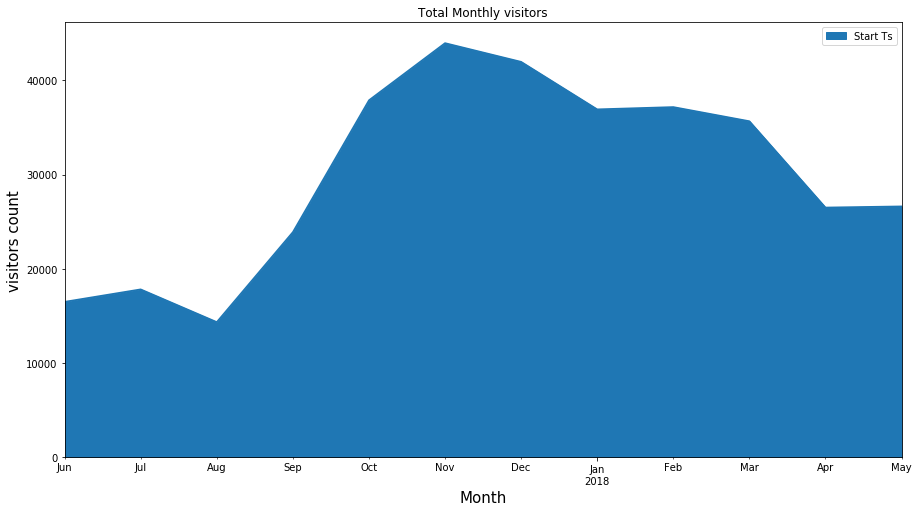

In [32]:
visits_monthly.plot.area(figsize = (15, 8));
plt.title('Total Monthly visitors')
plt.legend()
plt.xlabel('Month', size=15)
plt.ylabel('visitors count', size=15);

In the monthly graph we can see that the visits generally started falling on the month of april and the lowest number of visit is on the month of august, however it started climbing up during the last quarter of the year.

In [34]:
# to calculate the mean value of WAU, DAU and MAU we need to add the following culumns
visits['session_year']  = visits['Start Ts'].dt.year
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week']  = visits['Start Ts'].dt.week
visits['session_date'] = visits['Start Ts'].dt.date

In [35]:
# Groupby the session date to the mean number of  unique user id to calculate the DAU
dau_total = visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()

# Groupby the session year and month to the mean number of  unique user id to calculate the MAU
mau_total = visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()

# Groupby the session year and week  to the mean number of  unique user id to calculate the WAU
wau_total = visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()


In [36]:
print('The DAU mean value of the distribution :', dau_total )
print('The WAU mean value of the distribution :', wau_total )
print('The MAU mean value of the distribution :', mau_total )

The DAU mean value of the distribution : Uid    907.991758
dtype: float64
The WAU mean value of the distribution : Uid    5716.245283
dtype: float64
The MAU mean value of the distribution : Uid    23228.416667
dtype: float64


<p><a name="uniquedaysessions"></a></p>

* **How many sessions are there per day? (One user might have more than one session.)**

In [37]:
# we will first add the colum of number of visits per day by joining the grouped visits per day to visists dataset.
user_visit = visits.join(visits_by_date,on='visit_date')
user_visit.head()

,Device,End Ts,Source Id,Start Ts,Uid,visit_date,week,month,session_year,session_month,session_week,session_date,num_visits
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017,12,51,2017-12-20,1276
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018,2,8,2018-02-19,1490
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017,7,26,2017-07-01,391
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018,5,20,2018-05-20,723
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017,12,52,2017-12-27,1444


In [38]:
#visit_grouped = user_visit.groupby('visit_date')['Uid'].nunique()
visit_grouped = user_visit.groupby('visit_date').agg({'Uid': ['nunique']})
visit_grouped.columns = ['users']
visit_grouped.head()

,users
visit_date,
2017-06-01,605
2017-06-02,608
2017-06-03,445
2017-06-04,476
2017-06-05,820


By grouping the columns into cohort and making new columns for total number of visit and number of unique visits we can see how many users there are per day and how many of those users are unique which the difference from num_visits column and nunique are the users who made more than one session.

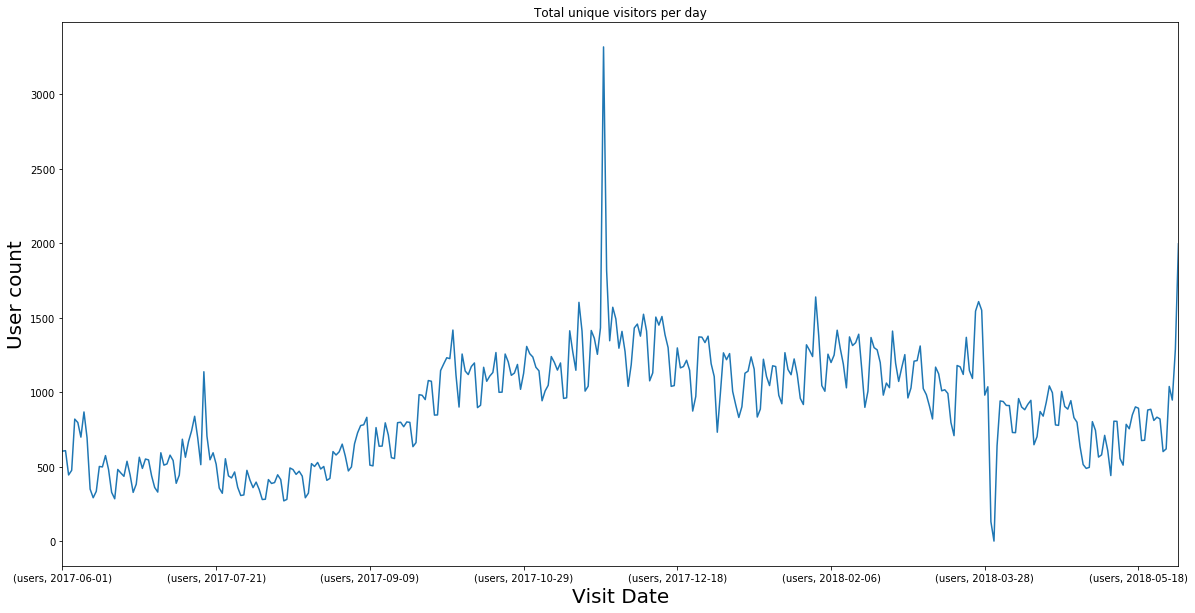

In [39]:
visit_grouped.unstack().fillna(0).plot(figsize = (20, 10))
plt.title('Total unique visitors per day')
plt.xlabel('Visit Date', size=20)
plt.ylabel('User count', size=20);

By filtering the daily visit by unique visitor and putting it in the graph, we can see when we had the highest number of new users which is recorded on min November.The Y axis represents the number of unique users who has session on a particular given date while the X axis represents the dates of sessions.

<p><a name="lengthsessions"></a></p>

 * **What is the length of each session?**

In [40]:
# Adding session length column to the dataframe by getting the diffirence between end ts and start ts column.
user_visit['session_length'] = user_visit['End Ts'] - user_visit['Start Ts']

user_visit.head()

,Device,End Ts,Source Id,Start Ts,Uid,visit_date,week,month,session_year,session_month,session_week,session_date,num_visits,session_length
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017,12,51,2017-12-20,1276,00:18:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018,2,8,2018-02-19,1490,00:28:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017,7,26,2017-07-01,391,00:00:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018,5,20,2018-05-20,723,00:24:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017,12,52,2017-12-27,1444,00:00:00


In [41]:
# converting the session_length into minutes and int format
user_visit['session_length'] = user_visit['session_length'].dt.total_seconds().div(60).astype(int)

In [42]:
# group by source id and calculate the average session per source 
session_grouped = user_visit.groupby('Source Id')[['session_length']].median().sort_values(by = 'session_length' , ascending = False)
session_grouped.head()

,session_length
Source Id,
1,10
2,7
6,7
10,5
3,4


In [43]:
# count the unique users per Group 
#Uid_session = session_grouped.agg({'Uid': ['count']})
#Uid_session.head()

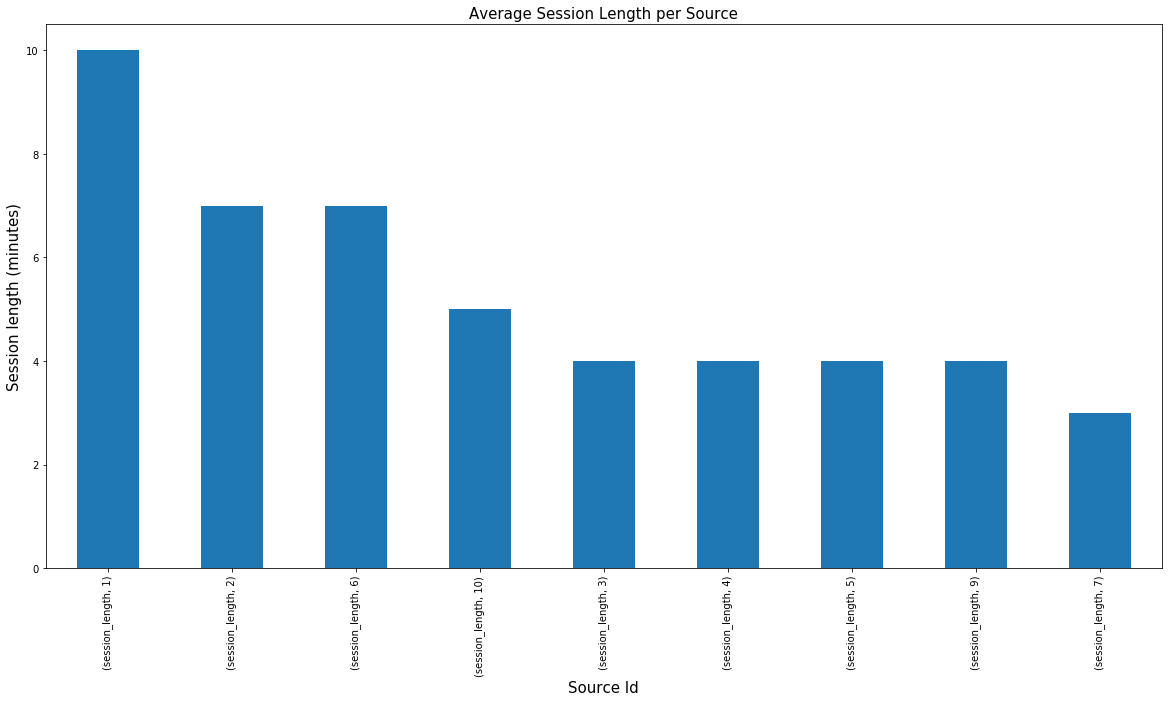

In [44]:
session_grouped.unstack().fillna(0).plot.bar(figsize = (20, 10))
plt.title('Average Session Length per Source', size=15)
plt.xlabel('Source Id', size=15)
plt.ylabel('Session length (minutes)', size=15);

By grouping the session length by source Id and calculating the average  session of users in every source, we will have a better view of the behavior of users and in each group. Here we can see that the users of Source id 1 spend and average of 10 minutes and followed by source 2 and 6. Using  median to evaluate the central tendency would be more accurate in this case as there are not many outliers so the average wouldn’t be skewed towards the outlier values.

<p><a name="userretention"></a></p>

 * **How often do users come back?**

    * We will calculate the retention rate cohort analysis.

In [45]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [46]:
visits['VisitMonth'] = visits['Start Ts'].apply(get_month)
visits['CohortMonth'] = visits.groupby('Uid')['VisitMonth'].transform('min')

In [47]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [48]:
invoice_year, invoice_month, _ = get_date(visits, 'VisitMonth')
cohort_year, cohort_month, _ = get_date(visits, 'CohortMonth')

In [49]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [50]:
visits['CohortIndex'] = year_diff * 12 + month_diff + 1

In [51]:
cohort_data = visits.groupby(['CohortMonth', 'CohortIndex'])['Uid'].apply(pd.Series.nunique).reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,Uid
0,2017-06-01,1,13259
1,2017-06-01,2,1043
2,2017-06-01,3,713
3,2017-06-01,4,814
4,2017-06-01,5,909


In [52]:
cohort_count = cohort_data.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'Uid')
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-06-01,100.0,7.9,5.4,6.1,6.9,7.1,6.1,5.8,5.2,5.1,4.1,4.5
2017-07-01,100.0,5.6,5.1,5.6,5.8,4.8,4.5,4.6,3.9,2.9,2.7,NaN
2017-08-01,100.0,7.7,6.3,6.3,5.0,4.4,3.6,3.9,2.8,2.6,NaN,NaN
2017-09-01,100.0,8.5,6.9,5.1,3.9,3.8,3.6,2.4,2.3,NaN,NaN,NaN
2017-10-01,100.0,7.9,5.2,3.9,3.4,3.2,2.1,2.0,NaN,NaN,NaN,NaN
2017-11-01,100.0,7.8,4.4,3.9,3.4,2.3,2.2,NaN,NaN,NaN,NaN,NaN
2017-12-01,100.0,5.6,3.8,3.1,2.0,1.9,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,100.0,6.0,3.9,2.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,100.0,5.7,2.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


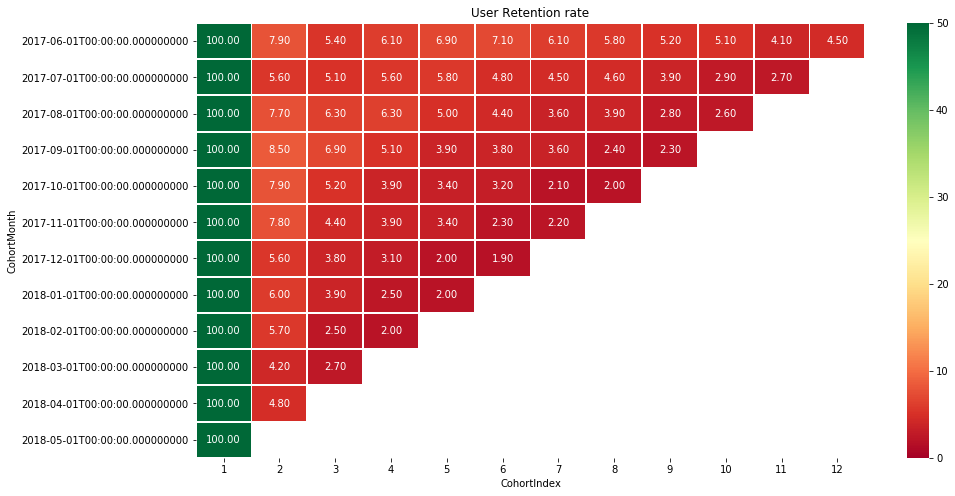

In [54]:
# Plot a heat map of the pivot tablke for for retention rate
plt.figure(figsize=(15, 8))
plt.title('User Retention rate')
sns.heatmap(retention.round(3) * 100, annot=True, fmt='.2f', linewidths=1, linecolor='white', vmin = 0.0,vmax = 50,cmap = 'RdYlGn')
plt.show();

From the above retention table – Triangular chart, we can conclude that number of users has been decreasing, like from total number of  users logged in on June 2017 which we will assume as 100% we can see a large drop on the next month which is 92% of the users did not come back and 596 was left on the month of May 2018 which is 4.6% from the users who logged in on June 2017.We can also see the high number of user starting at the month of october 2017 until december, it might have something to do with the season sale.There user lifetime (as depicted horizontally to the right of the table) – seeing the long term relationship with people in any cohort – to ascertain how long people are coming back and how strong or how valuable that cohort is. 

### Product Conclusion 

Upon obesrving the behavior of the users from the first day they logged in we notice the huge decline on the proceding month which is more than 90% of the users dont come back, however the number of visits go up on the last quarter of 2017 where November recorded the highest number of visits, so perhaps it has something to do with season sale and shopping. If we looked at the session time spent per Source id we can see that the users spend longer time compared to the other ad sources.On why the users dont come back must be analyzsed this can be presumably linked to something like the quality of the product, operations, and customer support.

---

<p><a name="Sales"></a></p>

#### Sales

<p><a name="buystart"></a></p>

* **When do people start buying?**

In [55]:
visits_orders = orders.merge(visits, on='Uid', how = 'left')
visits_orders.head()

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,visit_date,week,month,session_year,session_month,session_week,session_date,VisitMonth,CohortMonth,CohortIndex
0,2017-06-01 00:10:00,17.00,10329302124590727494,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-06-01,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017-06-01,2017-06-01,1
2,2017-06-01 00:27:00,0.37,17903680561304213844,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017-06-01,2017-06-01,1
3,2017-06-01 00:29:00,0.55,16109239769442553005,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017-06-01,2017-06-01,1
4,2017-06-01 07:58:00,0.37,14200605875248379450,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-06-01,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017-06-01,2017-06-01,1


In [56]:
#creating a new column the indicates the first purchase of the user
visits_orders['purchaseMonth'] = orders['Buy Ts'].astype('datetime64[M]')

In [57]:
#getting the difference between purchase date from visit date for the to make conversion column
visits_orders['conversion'] = visits_orders['purchaseMonth'] - visits_orders['VisitMonth']

In [58]:
# Checking for null values
print (visits_orders.isnull().sum().head())

Buy Ts     0
Revenue    0
Uid        0
Device     0
End Ts     0
dtype: int64


In [59]:
# Dropping the rows with Nan values to filter the dataframe
visits_orders = visits_orders.dropna(axis = 0)
visits_orders.head()

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,visit_date,week,month,session_year,session_month,session_week,session_date,VisitMonth,CohortMonth,CohortIndex,purchaseMonth,conversion
0,2017-06-01 00:10:00,17.00,10329302124590727494,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-06-01,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017-06-01,2017-06-01,1,2017-06-01,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017-06-01,2017-06-01,1,2017-06-01,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017-06-01,2017-06-01,1,2017-06-01,0 days
3,2017-06-01 00:29:00,0.55,16109239769442553005,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017-06-01,2017-06-01,1,2017-06-01,0 days
4,2017-06-01 07:58:00,0.37,14200605875248379450,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-06-01,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017-06-01,2017-06-01,1,2017-06-01,0 days


In [60]:
# converting the column to timedelta format
visits_orders['conversion'] =visits_orders['conversion'] / np.timedelta64(1,'M')

In [61]:
#converting the conversion column to int and round it off
visits_orders['conversion']= visits_orders['conversion'].round(0)

In [62]:
source_purchases = visits_orders.groupby(['conversion', 'Source Id'])[['Uid']].count().sort_values(by= 'Uid', ascending = False)
source_purchases.columns = ['Total Orders']
source_purchases.head()

,,Total Orders
conversion,Source Id,
0.0,1,1640
1.0,1,1584
2.0,1,1456
-1.0,1,1435
3.0,1,1357


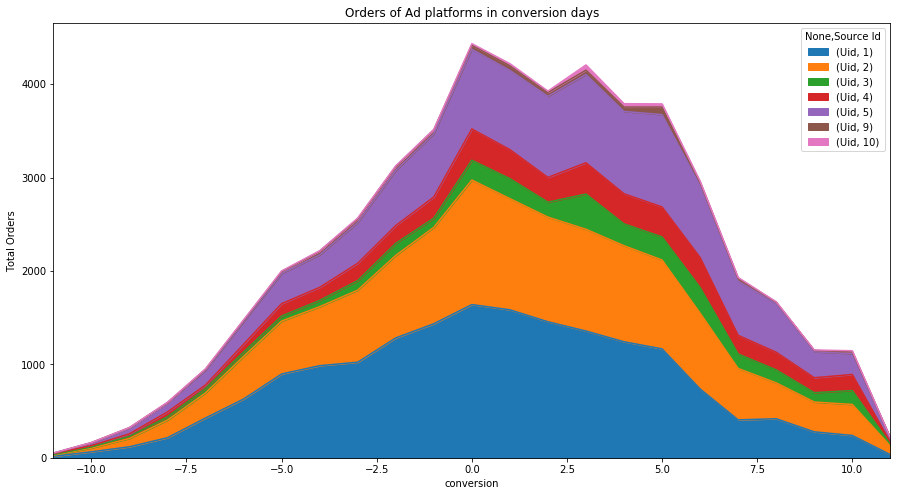

In [63]:
source_purchases = visits_orders.groupby(['conversion', 'Source Id'])[['Uid']].count().unstack().fillna(0).plot.area(figsize = (15, 8))
plt.title('Orders of Ad platforms in conversion days')
plt.ylabel('Total Orders');

By making a graph of the orders from different platform sorted in convertion days.we can see that there are more buyers who converted on 6th day, however there are users that were converted after few days of visit which is also considered normal.Our data shows that the longest conversion day is 12 days. This could mean that if marketing ads can be around this range to.

<p><a name="effectivechannel"></a></p>

* **which marketing channel, is most effective?**

we will be grouping the columns 'Source Id' and 'Revenue' for us to know which ad source earns most.

In [64]:
visit_orders_rev = visits_orders.groupby('Source Id')[['Revenue']].sum().round(0)
visit_orders_rev.sort_values(by= 'Revenue', ascending = False)

,Revenue
Source Id,
1,120492.0
2,92933.0
5,54530.0
4,24197.0
3,14902.0
9,2546.0
10,1272.0


Revenue per Ad source in graphical presentation

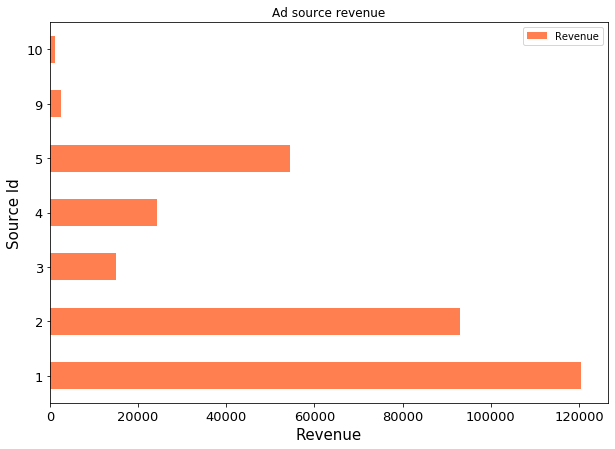

In [65]:
visit_orders_rev.plot(kind='barh', figsize=(10,7), color="coral", fontsize=13);
plt.title('Ad source revenue')
plt.xlabel('Revenue', size=15)
plt.ylabel('Source Id', size=15);

The top 3 ad source in terms of revenue are source Id 2,1 and 5, the rest of the 3 sources namely 7, 9 and 10 barely makes revenue, maybe this is something to look into why.

Orders made in different Ad platforms for every coversion days in graphical presentation

<p><a name="ordertime"></a></p>

 * **How many orders do they make during a given period of time?**
 
 We will calculate the  quantity of orders on the time series basis, seeing how the purchase quantity changes along with months.

In [66]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [67]:
#Group the users by the column of date purchased
first_order_date_by_customers = orders.groupby('Uid')['Buy Ts'].min()
# change the column name
first_order_date_by_customers.name = 'first_order_date'

In [68]:
# join the grouped data frame to original orders dataframe
orders = orders.join(first_order_date_by_customers,on='Uid')

In [69]:
# make a monthly cohort for date of purchased
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

In [70]:
# make a month column for the  date of purchase
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')

In [71]:
#group the chort month, purchase month by the sum of revenue for every  users
orders_quantity_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'Revenue':'sum','Uid':'count'})
orders_quantity_by_cohorts.columns = ['Revenue', 'Total orders']
orders_quantity_by_cohorts.head()

Revenue  Total orders
first_order_month order_month                       
2017-06-01        2017-06-01   9557.49          2354
                  2017-07-01    981.82           177
                  2017-08-01    885.34           174
                  2017-09-01   1931.30           226
                  2017-10-01   2068.58           292

In [72]:
# make pivot table of the grouped dataframe
qty_orders_by_cohort = orders_quantity_by_cohorts.pivot_table(index='first_order_month',columns='order_month',values='Total orders',aggfunc='sum')
qty_orders_by_cohort.fillna('') 

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2354,177,174,226,292,218,276,174,212,153,96,86,
2017-07-01,,2186,100,120,104,72,82,61,50,58,24,53,
2017-08-01,,,1533,108,100,81,85,62,49,78,46,46,
2017-09-01,,,,2933,219,161,164,67,109,108,56,61,
2017-10-01,,,,,4964,314,162,122,129,103,86,125,
2017-11-01,,,,,,4813,397,182,211,136,59,102,
2017-12-01,,,,,,,5052,270,202,179,86,105,
2018-01-01,,,,,,,,3783,224,159,64,78,
2018-02-01,,,,,,,,,4095,222,83,70,


It is observed that the quantity of the purchase on the website was facing a massive decline every month. It is a warning signal that users stop buying merchandise on the website. The reason needs further investigation.

<p><a name="avgpurchase"></a></p>

* **What is the average purchase size ?**

We will look at the cohort month average purchasing size 

In [73]:
#group the chort month, purchase month by the sum of revenue for every unique users
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'Revenue':'sum','Uid':'nunique'})
orders_grouped_by_cohorts.head()

Revenue   Uid
first_order_month order_month               
2017-06-01        2017-06-01   9557.49  2023
                  2017-07-01    981.82    61
                  2017-08-01    885.34    50
                  2017-09-01   1931.30    54
                  2017-10-01   2068.58    88

In [74]:
# calculate the revenue per user and ad a column for it in the datframe
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['Revenue'] / orders_grouped_by_cohorts['Uid'] 

In [75]:
# make pivot table of the grouped dataframe
orders_by_cohort = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean')
orders_by_cohort.fillna('') 

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.72441,16.0954,17.7068,35.7648,23.5066,22.2078,31.0119,25.0332,19.2957,27.2336,25.6813,9.80415,
2017-07-01,,6.01022,12.3963,21.036,10.7861,6.93816,7.89684,6.42111,6.99282,7.38214,12.8618,11.5138,
2017-08-01,,,5.27652,11.1488,11.8513,12.183,16.9212,12.1391,9.62033,12.6105,21.07,8.30742,
2017-09-01,,,,5.64453,22.1884,13.4452,138.669,19.8815,26.095,27.4371,16.9614,11.0447,
2017-10-01,,,,,5.00373,11.2874,6.75325,7.41315,7.0728,7.25514,6.57321,7.4797,
2017-11-01,,,,,,5.15468,7.33905,6.78658,12.5107,7.45728,4.58083,7.56484,
2017-12-01,,,,,,,4.73819,7.81658,39.366,48.1351,27.4314,23.5184,
2018-01-01,,,,,,,,4.13564,8.72123,12.3655,11.1998,4.69956,
2018-02-01,,,,,,,,,4.15699,8.61,4.94241,6.94103,


by making pivot we see  which cohorts revenue per user increased in the month following the month of first purchase. For some cohorts, revenue per user increased like for instance, the last quarter of 2017.

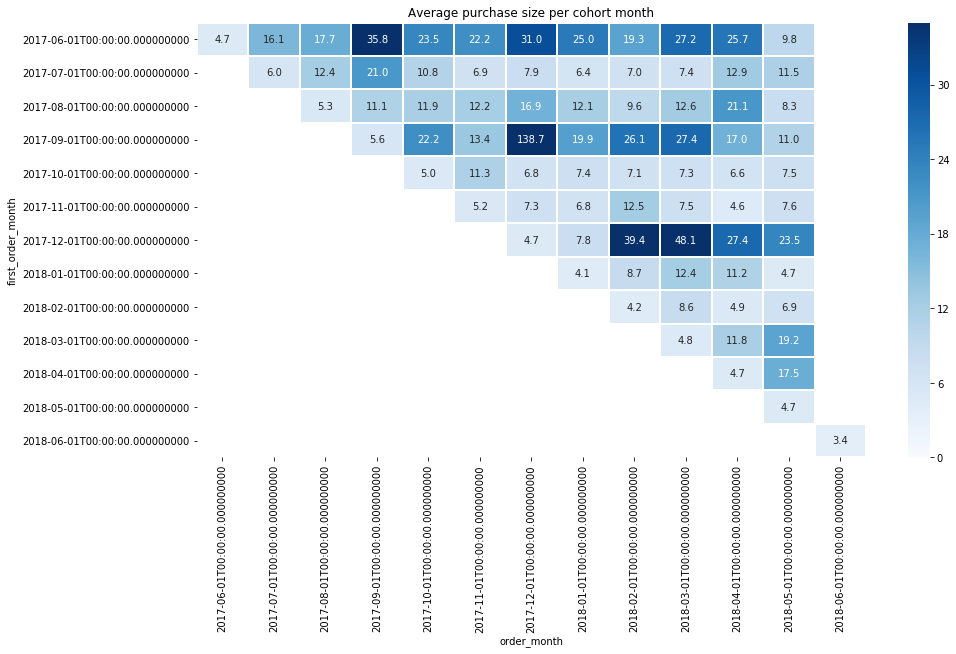

In [76]:
# Plot a heat map of the pivot tablke for average revenue per cohort month
plt.figure(figsize=(15, 8))
plt.title('Average purchase size per cohort month')
sns.heatmap(orders_by_cohort, annot=True, fmt='.1f', linewidths=1, linecolor='white', vmin = 0.0,vmax = 35,cmap = 'Blues')
plt.show();

The average purchase size of the 2017 -9 cohort stands out especially in the month of decemeber. This huge change becomes apparent when we look at first lifetime month. The 2017-12 cohort demonstrates interesting behavior, as well: the average purchase spikes in the second and third months. 

<p><a name="LTV"></a></p>

* **How much money do they bring? (LTV)?**

 we will look at the revenue and LTV of every user per cohort month.
 

In [77]:
orders.head()

,Buy Ts,Revenue,Uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [78]:
cohort_sizes = orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head() 

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [79]:
cohorts = orders.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [80]:
sales_report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
sales_report.head() 

,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [81]:
margin_rate = .5

In [82]:
sales_report['gp'] = sales_report['Revenue'] * margin_rate

In [83]:
sales_report['age'] = (sales_report['order_month'] - sales_report['first_order_month']) / np.timedelta64(1, 'M')

In [84]:
sales_report['age'] = sales_report['age'].round().astype('int')
sales_report.head()

,first_order_month,n_buyers,order_month,Revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


In [85]:
sales_report['ltv'] = sales_report['gp'] / sales_report['n_buyers']

In [118]:
# we will find the average cumulative LTV for every age from the moment the first order was made
sales_output_ = sales_report.pivot_table(index='first_order_month', columns='age', values='ltv')
sales_output_.cumsum(axis=1).mean(axis=0)

age
0     2.400841
1     2.697833
2     2.910905
3     3.344881
4     3.649317
5     3.984526
6     4.193843
7     4.541791
8     5.031042
9     4.625670
10    5.002308
11    5.939617
dtype: float64

In [115]:
sales_output = sales_report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
sales_output.cumsum(axis=1).fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.362207,2.60487,2.82369,3.30103,3.81229,4.18004,4.65526,4.94606,5.22266,5.52556,5.81119,5.93962
2017-07-01,3.005109,3.17271,3.48448,3.66397,3.75236,3.83039,3.89049,3.9614,4.04202,4.11559,4.19343,
2017-08-01,2.638259,2.87426,3.1035,3.29914,3.54616,3.68793,3.79326,3.99577,4.14187,4.23586,,
2017-09-01,2.822265,3.38106,3.64152,5.62942,5.8297,6.15323,6.50404,6.62561,6.71761,,,
2017-10-01,2.501866,2.76975,2.86544,2.94402,3.0198,3.07998,3.12239,3.18012,,,,
2017-11-01,2.577341,2.77696,2.87674,3.03921,3.11322,3.14016,3.19762,,,,,
2017-12-01,2.369095,2.49928,2.96183,3.49447,3.65093,3.81996,,,,,,
2018-01-01,2.067818,2.2152,2.36734,2.43873,2.47008,,,,,,,
2018-02-01,2.078494,2.21763,2.25689,2.29396,,,,,,,,


In [123]:
# Pivot table of mean LTV for the different ages
avg_output = sales_output.cumsum(axis=1).append(pd.Series(sales_output_.cumsum(axis=1).mean(axis=0),name='Average_ltv'))
avg_output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01 00:00:00,2.362207,2.60487,2.82369,3.30103,3.81229,4.18004,4.65526,4.94606,5.22266,5.52556,5.81119,5.93962
2017-07-01 00:00:00,3.005109,3.17271,3.48448,3.66397,3.75236,3.83039,3.89049,3.9614,4.04202,4.11559,4.19343,
2017-08-01 00:00:00,2.638259,2.87426,3.1035,3.29914,3.54616,3.68793,3.79326,3.99577,4.14187,4.23586,,
2017-09-01 00:00:00,2.822265,3.38106,3.64152,5.62942,5.8297,6.15323,6.50404,6.62561,6.71761,,,
2017-10-01 00:00:00,2.501866,2.76975,2.86544,2.94402,3.0198,3.07998,3.12239,3.18012,,,,
2017-11-01 00:00:00,2.577341,2.77696,2.87674,3.03921,3.11322,3.14016,3.19762,,,,,
2017-12-01 00:00:00,2.369095,2.49928,2.96183,3.49447,3.65093,3.81996,,,,,,
2018-01-01 00:00:00,2.067818,2.2152,2.36734,2.43873,2.47008,,,,,,,
2018-02-01 00:00:00,2.078494,2.21763,2.25689,2.29396,,,,,,,,


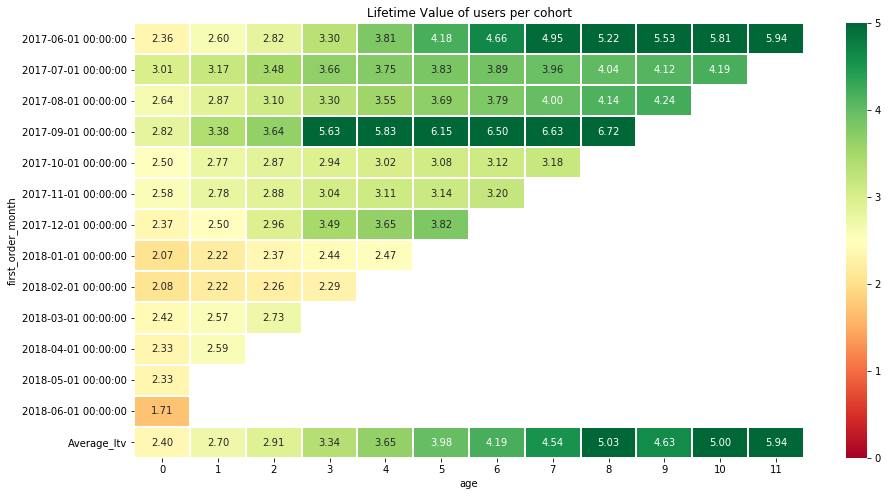

In [125]:
# Plot a heat map of the pivot tablke for average revenue per cohort month
plt.figure(figsize=(15, 8))
plt.title('Lifetime Value of users per cohort')
sns.heatmap(avg_output, annot=True, fmt='.2f', linewidths=1, linecolor='white', vmin = 0.0,vmax = 5,cmap = 'RdYlGn')
plt.show();

Looking at the LTV of users in every cohort month, it represents the total amount of money a customer is expected to spend. If we look at the first cohort month where the buyer spends 2.36 and on 11th month is is expected to spend 5.94. This is an important figure to know because it helps us make decisions about how much money to invest in acquiring new customers and retaining existing ones.The cohort 2017-19 looks interesting because its values are higher than the others, maybe it would help to look at the factors that might cause this.

### Sales Conclusion

By analyzing the sales KPI, average purchases size , and longterm value of users, we will be able to answer the following question :Is our business growing steadily? Are you on track regarding the sales targets? and so on. In this case here we already know that users from source Id 1 brings most of the money but the others are not, which enables us to ask targeted questions about this cohort compared to others? What other attributes do these users share which might be causing them to stick around? How were the majority of these users acquired? Was there a specific marketing campaign that brought them in? Did they take advantage of a promotion at sign-up? The answers to these questions would inform future marketing and product efforts.

<p><a name="marketing"></a></p>

#### Marketing

* **How much money was spent? Overall/per source/over time**


In [89]:
# Open the expenses data frame
expenses.columns = ['Source Id', 'Date', 'Costs']
expenses.head()

,Source Id,Date,Costs
0,1,2017-06-01,75
1,1,2017-06-02,62
2,1,2017-06-03,37
3,1,2017-06-04,55
4,1,2017-06-05,57


In [90]:
# calculating the total marketing expenses
total_exp = expenses['Costs'].sum()
print('The overall marketing expenses of the company is $', total_exp)

The overall marketing expenses of the company is $ 329136


In [91]:
# calculating the marketing expenses per source
source_costs = expenses.groupby('Source Id')[['Costs']].sum().sort_values(by= 'Costs', ascending = False)
source_costs

,Costs
Source Id,
3,141321
4,61069
5,51767
2,42805
1,20837
10,5818
9,5519


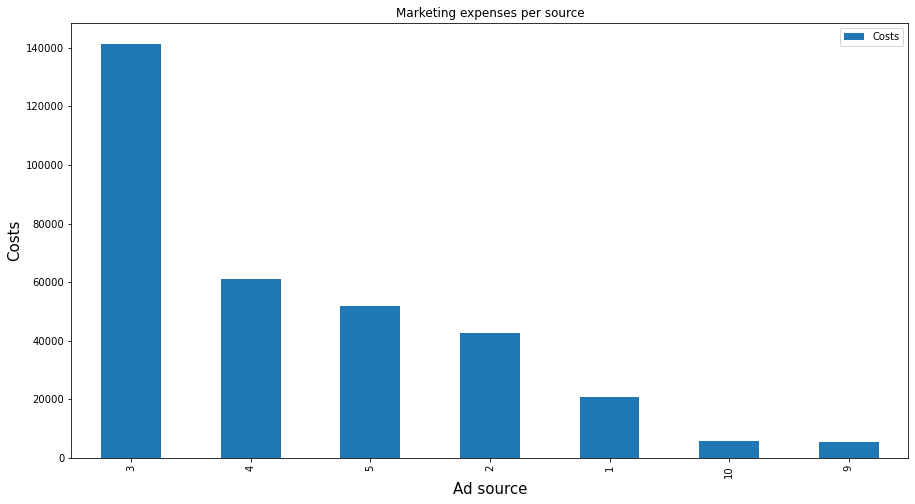

In [92]:
source_costs.plot.bar(figsize = (15, 8))
plt.title('Marketing expenses per source')
plt.xlabel('Ad source', size=15)
plt.ylabel('Costs', size=15);

Source 3 had the highest marketing expenses its more than twice the expenses to the rest the source.However it doest not generate the highest number of sales.

In [93]:
# Calculating the marketing expenses per month.
expenses['month'] = expenses['Date'].astype('datetime64[M]')

In [94]:
monthly_cost = expenses.groupby('month')[['Costs']].sum()
monthly_cost.head()

,Costs
month,
2017-06-01,18016
2017-07-01,18242
2017-08-01,14788
2017-09-01,24374
2017-10-01,36331


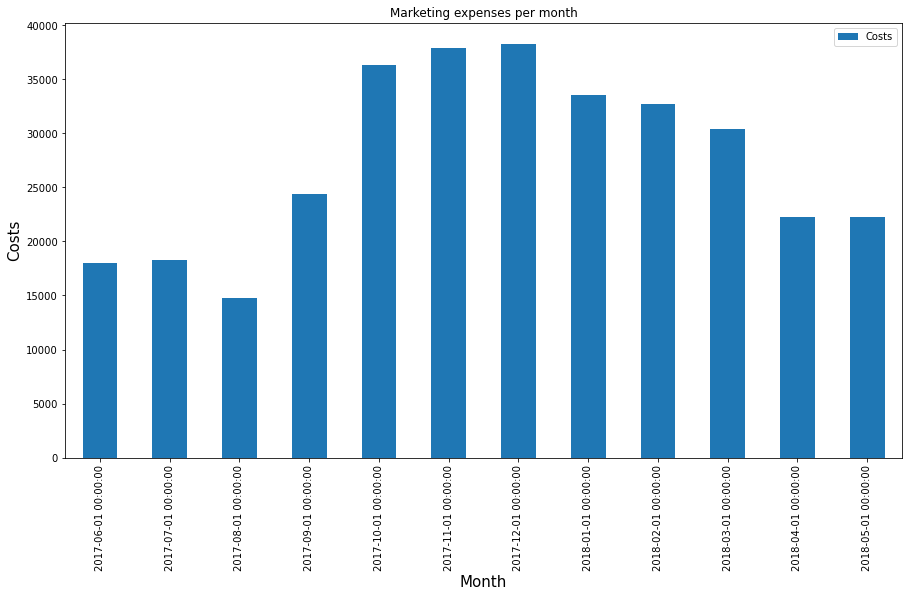

In [95]:
monthly_cost.plot.bar(figsize = (15, 8))
plt.title('Marketing expenses per month')
plt.xlabel('Month', size=15)
plt.ylabel('Costs', size=15);

The graphs shows that the highest expenses for marketing occured at the last quarter of 2017 which is around Christmas season, it paid off because it is also the time with the highest number of visits and sales.

<p><a name="cac"></a></p>

* **How much did customer acquisition from each of the sources cost?**

In [96]:
expenses.head()

,Source Id,Date,Costs,month
0,1,2017-06-01,75,2017-06-01
1,1,2017-06-02,62,2017-06-01
2,1,2017-06-03,37,2017-06-01
3,1,2017-06-04,55,2017-06-01
4,1,2017-06-05,57,2017-06-01


In [97]:
# calculating the costs per month
monthly_costs = expenses.groupby(['month'])[['Costs']].sum()
monthly_costs.head() 

,Costs
month,
2017-06-01,18016
2017-07-01,18242
2017-08-01,14788
2017-09-01,24374
2017-10-01,36331


In [98]:
cost_report = pd.merge(sales_report, monthly_costs, left_on='first_order_month', right_on='month')

In [99]:
cost_report['CAC'] = cost_report['Costs'] / cost_report['n_buyers']
cost_report.head() 

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,Costs,CAC
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,18016,8.905586
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,18016,8.905586
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,18016,8.905586
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,18016,8.905586
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,18016,8.905586


<p><a name="ROI"></a></p>

* **How worthwhile where the investments? (ROI)**

     We will be calculating the return of monthly investment with heatmaps and the same time the return of investment per   Source Id.

In [100]:
# Calculating the ROI and adding it to the column
cost_report['ROI'] = cost_report['ltv'] / cost_report['CAC']

In [101]:
#creating pivot table for the ROI
cost_output = cost_report.pivot_table( index='first_order_month', columns='age',  values='ROI', aggfunc='mean')
cost_output.cumsum(axis=1).round(2).fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.27,0.29,0.32,0.37,0.43,0.47,0.52,0.56,0.59,0.62,0.65,0.67
2017-07-01,0.32,0.33,0.37,0.39,0.4,0.4,0.41,0.42,0.43,0.43,0.44,
2017-08-01,0.24,0.27,0.29,0.31,0.33,0.34,0.35,0.37,0.38,0.39,,
2017-09-01,0.30,0.36,0.39,0.6,0.62,0.65,0.69,0.7,0.71,,,
2017-10-01,0.30,0.33,0.34,0.35,0.36,0.37,0.37,0.38,,,,
2017-11-01,0.28,0.3,0.31,0.33,0.34,0.34,0.34,,,,,
2017-12-01,0.27,0.29,0.34,0.4,0.42,0.44,,,,,,
2018-01-01,0.21,0.22,0.24,0.25,0.25,,,,,,,
2018-02-01,0.23,0.25,0.25,0.26,,,,,,,,


We will calculate the CAC of the cohort

In [102]:
# selecting a particular cohort month
cohort201701 = cost_report[cost_report['first_order_month'] == '2017-06-01']

In [103]:
# calculating costs for the cohort month
cost201701 = cost_report[cost_report['order_month'] == '2017-06-01']['Costs'].sum()

In [104]:
n_buyers201701 = cohort201701['n_buyers'][0]

In [105]:
# calculating the CAC and LTV for the particular cohort
cac201701 = cost201701 / n_buyers201701
ltv201701   = cost_output.cumsum(axis=1).loc['2017-06-01'].sum()

In [106]:
print('CAC =', cac201701)
print('LTV =', ltv201701)

CAC = 8.905585763717252
LTV = 5.747457537744223


Acquiring each customer cost the company an average of 8.9 while each customer spend 5.7. So investment in customer acquisition did not paid off and the company is loosing money.

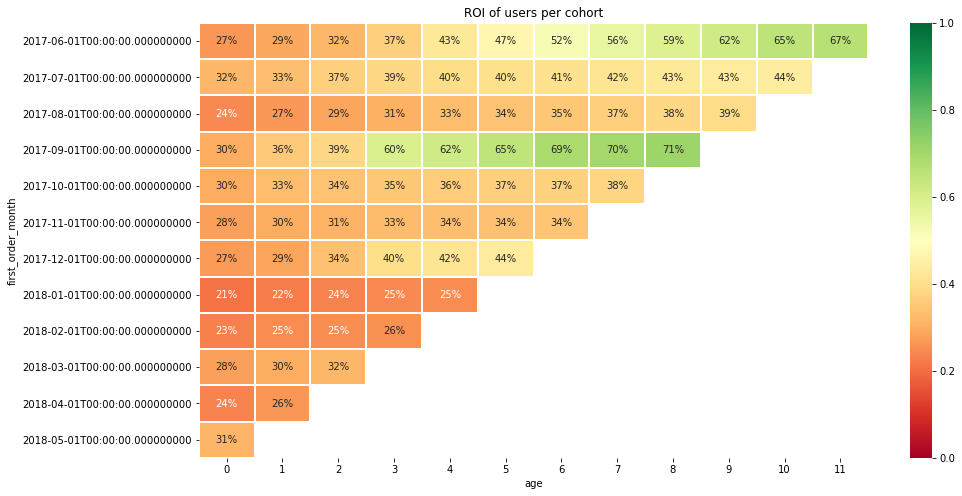

In [108]:
# Plot a heat map of the pivot tablke for average revenue per cohort month
plt.figure(figsize=(15, 8))
plt.title('ROI of users per cohort')
sns.heatmap(cost_output.cumsum(axis=1), annot=True,fmt = '.0%', linewidths=1, linecolor='white', vmin = 0.0,vmax = 1,cmap = 'RdYlGn')
plt.show();

As we look at our heat map for ROI, we can generally say that the website is not making enough money to break even the acquisition cost of each cutomer. We nee dto have at least 3.2 ROI to pay off the cost and higher to earn. Looking at why the buyers dont come back and choosing Ad sources to invest to might be a good thing to consider´and also.


<p><a name="step2_conclusion"></a></p>

### Marketing Conclusion

in this part we analyze the make reports and calculate metrics to determine the conversion, expenses, profitability, retention and aquisition cost. The marketing budget was not distributed equally to each ad source, however i noticed that the marketing expenses was distributed evenly on a monthly basis. The last quarter of 2017 has the highest marketing expenses which is correct since quarter generates also the highest orders.The company is also not making enough sales to compensate with the expenses it make on the marketing.

<p><a name="Step 3"></a></p>

###  Step 3.Conclusion: advise on how much money to invest and where.

I am recommending to invest in Source Id 1 for marketing. After using marketing funnel by means of consolidating and grouping the columns, results shows that Source Id 1 has been the most effective marketing channel in terms of revenue, users conversion and and ROI. It only has 20837 marketing expenses and with 1 aquisition cost per customer however it has a revenue of 120492 which is the highest among all the other sources.I noticed the almost equal distribution of marketing expenses if we look at the monthly cohort, but i would recomend that we focus more on investing more on the source that generates more revenue.If we look at the ROI in general the company is not earning, but like most other company problem when the retention and roi is decreasing as the time goes by, maybe its better that we focus on doing something about it by investing more in the sources where engagement and conversion is higher.